# Regresión SVR

https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR  # Es más rápido que SVR para casos lineales
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('../data/cement.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot: >

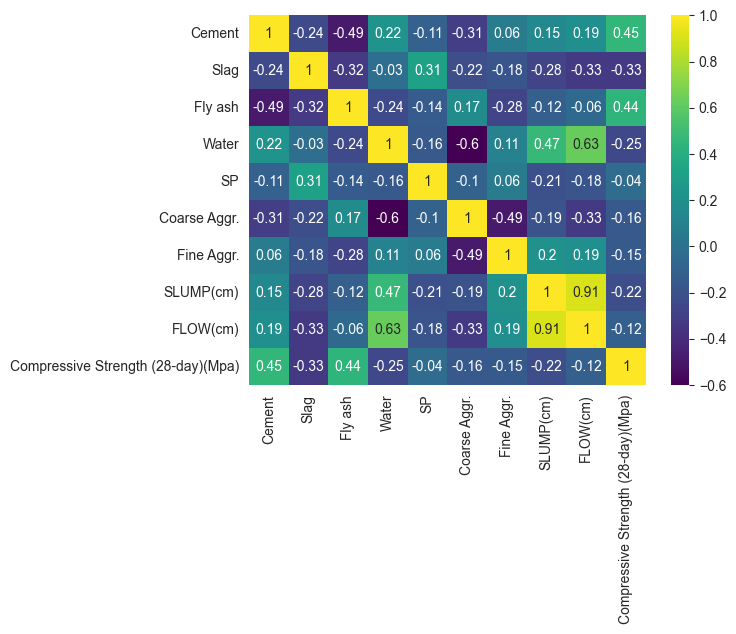

In [6]:
sns.heatmap(df.corr().round(2),  cmap='viridis', annot=True)

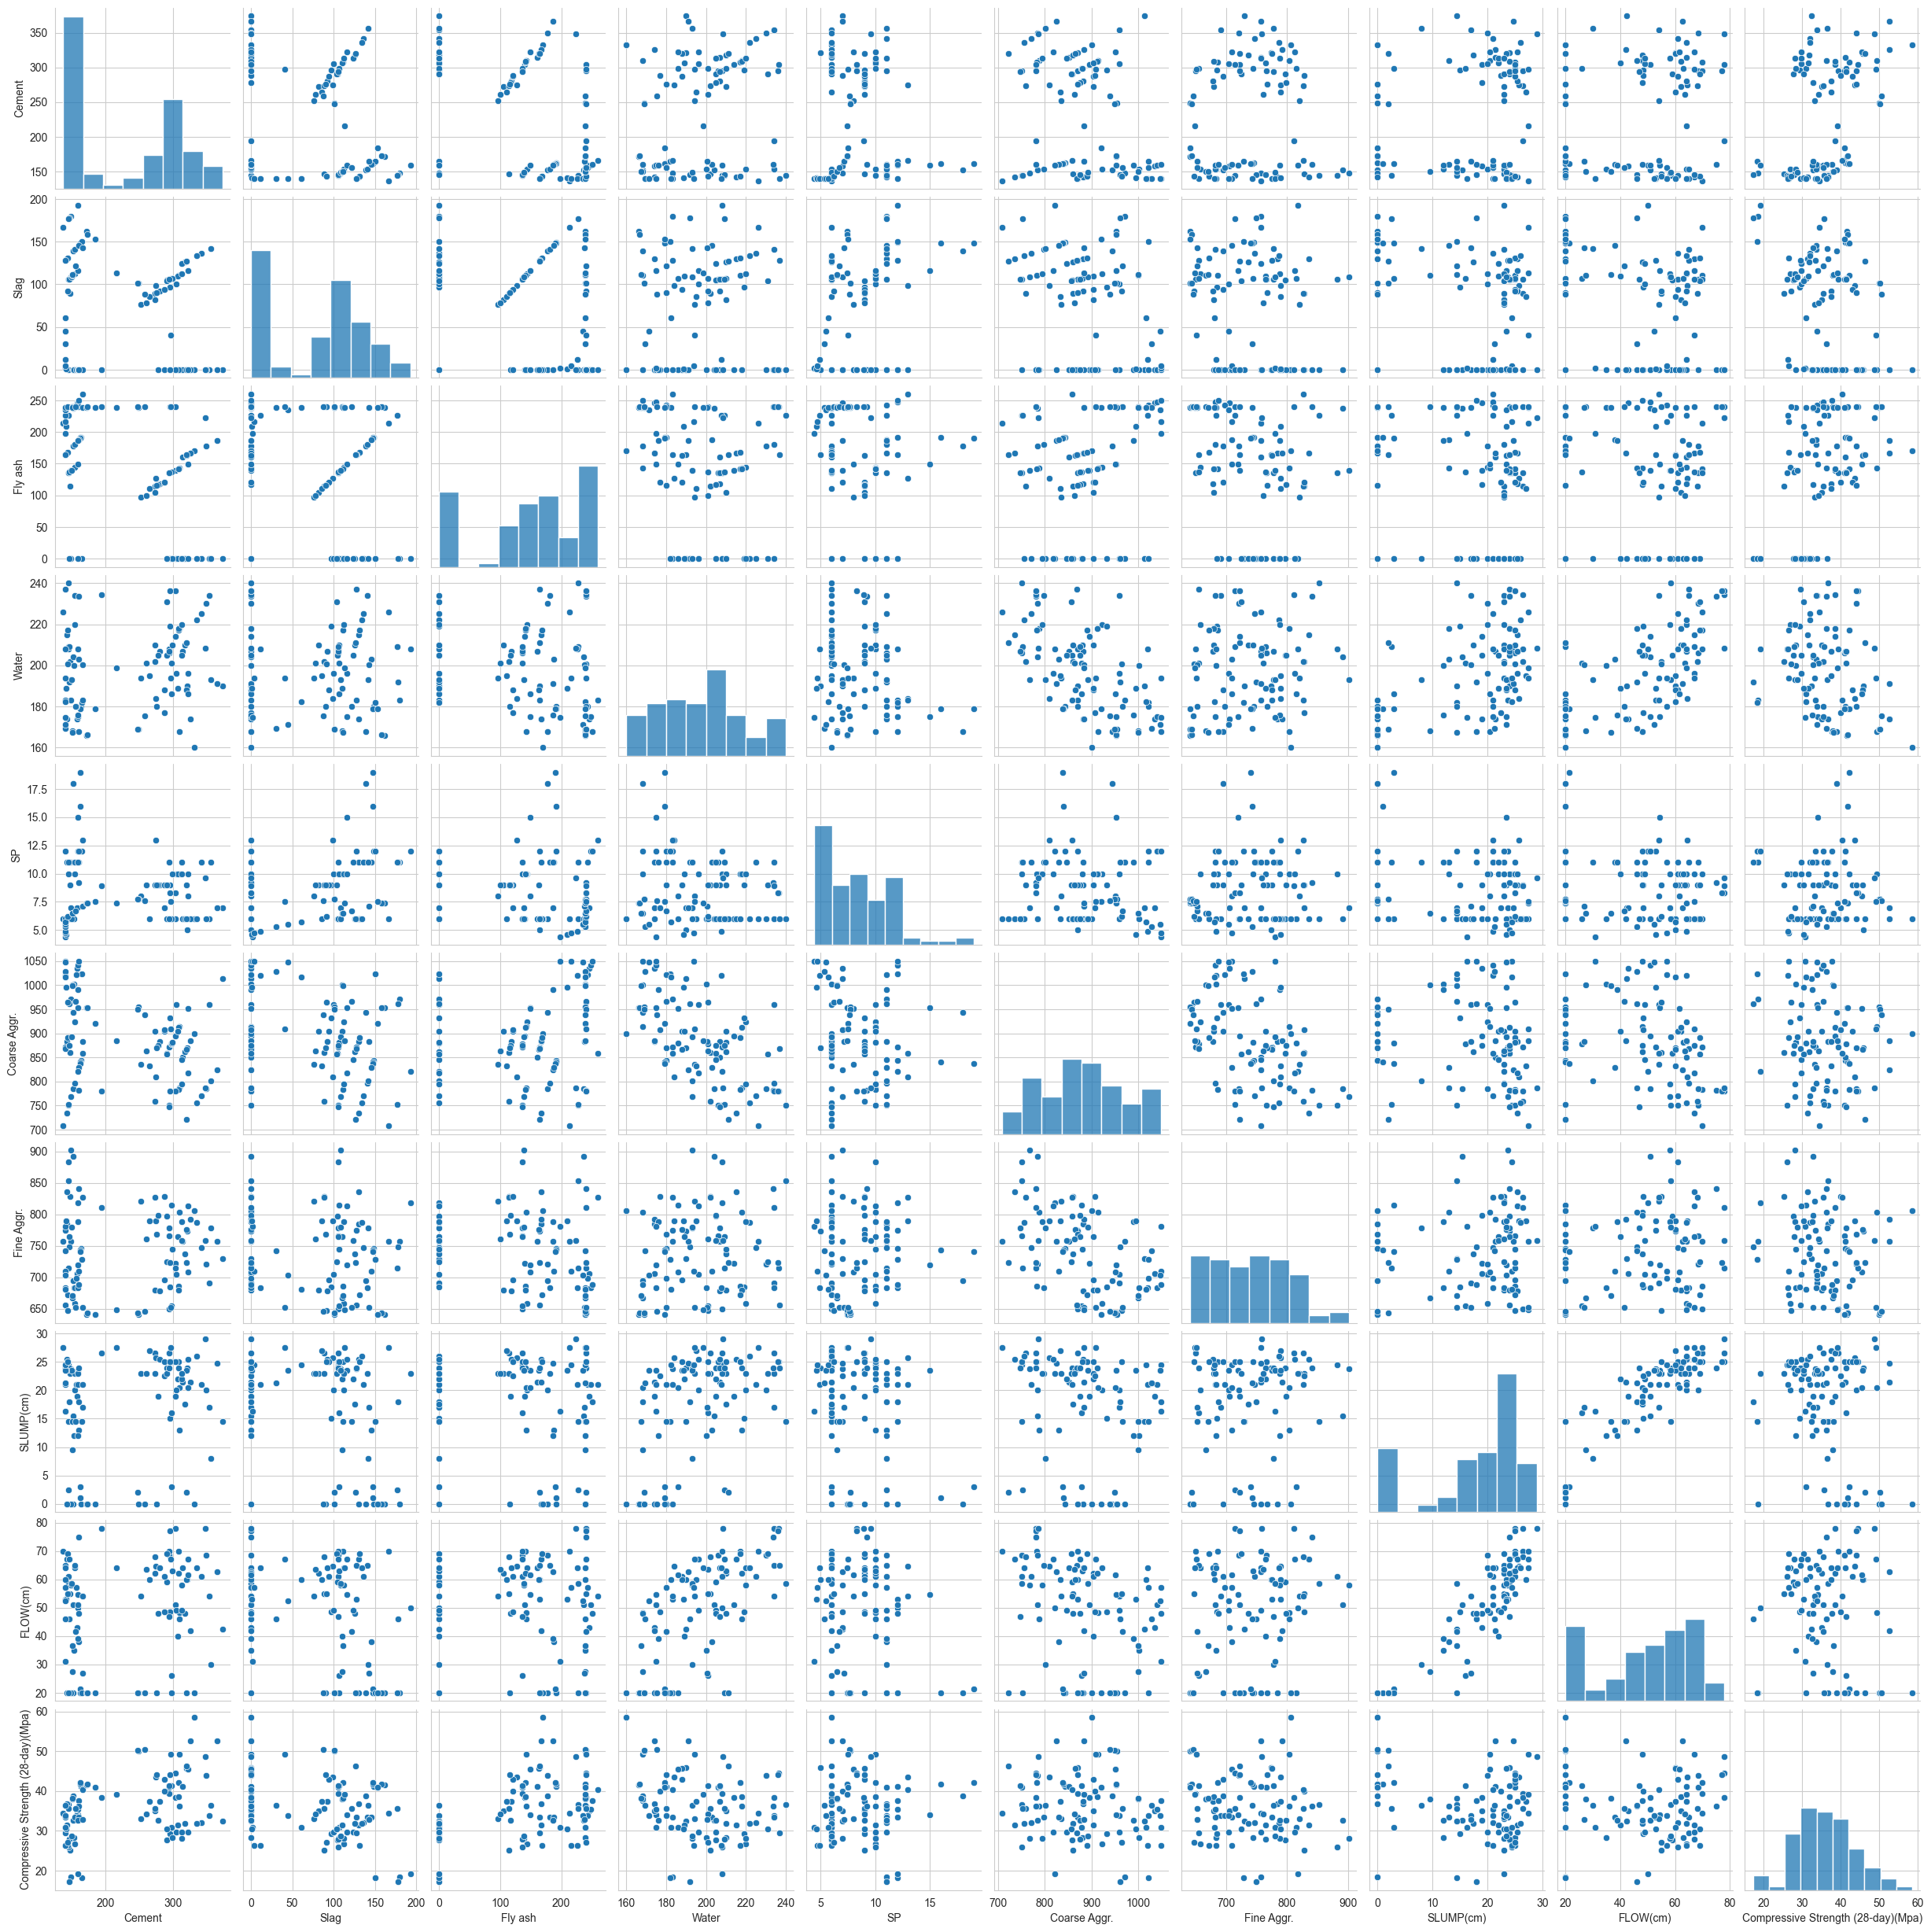

In [7]:
sns.pairplot(data=df)

In [8]:
# df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [11]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [12]:
model = SVR()
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)

In [13]:
r2_score(y_test, y_pred)

0.33580627020920073

In [14]:
mean_absolute_error(y_test, y_pred)

5.259533818550809

In [15]:
# opción 1: cuidado! puede tardar mucho tiempo
# param_grid = {'C':[0.001,0.01,0.1,0.5,1],
#             'kernel':['linear','rbf','poly'],
#              'gamma':['scale','auto'],
#            'degree':[2,3,4],
#          'epsilon':[0,0.01,0.1,0.5,1,2]
#       }

# opción 2
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['linear','rbf',],
              'gamma':['scale','auto'],
              'epsilon':[0,0.01,0.1,0.5]
              }
model = SVR()
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1)
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'epsilon': [0, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [16]:
# {'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}
grid_model.best_params_

{'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [17]:
y_pred = grid_model.predict(scaled_X_test)

In [18]:
r2_score(y_test, y_pred)

0.8907237608248404

In [20]:
mean_absolute_error(y_test, y_pred)

2.191463762502869

In [21]:
# probando degree en GridSearch nos salen los mejores parámetros los siguientes:
model = SVR(C=1, epsilon=2, gamma='scale', kernel='linear')
# model = SVR()
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)
r2_score(y_test, y_pred)

0.9101930354447602

In [22]:
mean_absolute_error(y_test, y_pred)

1.9861144916476636